In [365]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import nltk
import json
import tensorflow as tf
from six.moves import urllib
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import *

 ## get the data
 we can load the data using two ways
 - using pandas
 - using json.loads

In [131]:
url_path="https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json"
data=pd.read_json(url_path,lines=True)


In [132]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## another way of getting  the data


In [133]:
DOWNLOADED_FILENAME = 'Sarcasm_Headlines_Dataset.json'

def download_file(url_path):
    if not os.path.exists(DOWNLOADED_FILENAME):
        filename, _ = urllib.request.urlretrieve(url_path, DOWNLOADED_FILENAME)

    print('Found and verified file from this path: ', url_path)
    print('Downloaded file: ', DOWNLOADED_FILENAME)
    

def read_words():
    data=[]
    with open('Sarcasm_Headlines_Dataset.json',"r") as f:
        for line in f:
            data.append(json.loads(line))# this will return us a dictionary
        
    return data    
        
data_json=read_words()           

In [134]:
# visualize the data read
data_json[:5]

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

## Convert the dictionary to a dataframe

In [216]:
data=pd.DataFrame.from_dict(data_json)

In [217]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [207]:
data.shape

(28619, 3)

## Drop article_link 

In [218]:
data.drop("article_link",axis=1,inplace=True)

In [209]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## EDA

In [219]:
# lets see first few headlines
for sent in data["headline"][:5]:
    print(sent+"\n")
    

thirtysomething scientists unveil doomsday clock of hair loss

dem rep. totally nails why congress is falling short on gender, racial equality

eat your veggies: 9 deliciously different recipes

inclement weather prevents liar from getting to work

mother comes pretty close to using word 'streaming' correctly



In [211]:
data["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

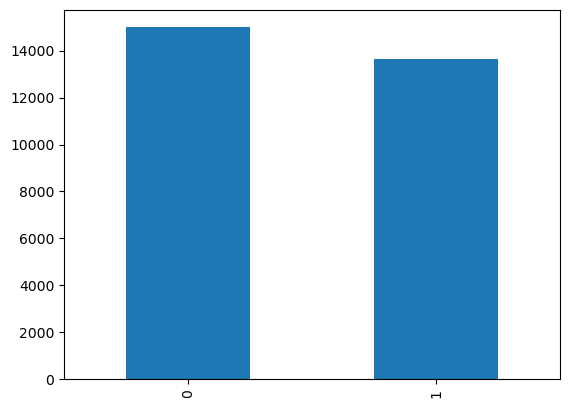

In [212]:
data["is_sarcastic"].value_counts().plot(kind="bar")
plt.show()

Dataset is fairly balanced

## Data Pre processing

In [220]:
# # removing punctuations
# def remove_punctuations(text):
#     punct_free="".join([t for t in text if t not in string.punctuation ])
#     return punct_free
# data["headline_clean"]=data["headline"].apply(lambda x: remove_punctuations(x))

# # Lowering text
# # # It is one of the most common preprocessing steps where the text is converted into 
# # the same case preferably lower case. 
# data["headline_clean"]=data["headline_clean"].apply(lambda x: x.lower())

# data["headline_clean"]=data["headline_clean"].apply(lambda x: x.strip())

# print("Actual Data=====>",data["headline"][1])
# print("Cleaned Data=====>",data["headline_clean"][1])

## tokenize
# data["headline_clean"]=data["headline"].apply(lambda x: word_tokenize(x))

"""
Since we are using keras tokenizer we will just remove the stop words.
Rest above step will be taken care by the keras tokenizer 
"""

'\nSince we are using keras tokenizer we will just remove the stop words.\nRest above step will be taken care by the keras tokenizer \n'

## Remove Stop words

In [227]:
stop_words= set(stopwords.words("english"))
   
def remove_stopwords(text):
    filtered_words=[word for word in text.split() if word not in stop_words]
    return " ".join(filtered_words) # this join step is necessary because filtered words will be tokens and join will recreate the sentence

In [237]:
data["headline_clean"]=data["headline"].apply(lambda x: remove_stopwords(x))

In [238]:
data.head()

,is_sarcastic,headline,headline_clean
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close using word 'streamin...


- we can do frequency filtering just like stop word removal using min_df and max_df in countvectorizer.
- In lingustics, stemming is the process of reducing inflected or derived words to their stem, base or root form, even if the stem itself is nota valid word in the language.
- Lemmetization reduces the inflected words to the root word, the root word belongs to the language. the root word is called the lemma

## Lemmetization

In [239]:
lemmetizer=WordNetLemmatizer()
def lemmetize(text):
    text_lemetize= [lemmetizer.lemmatize(word,pos="v") for word in text.split()]
    return " ".join(text_lemetize)
    
data["headline_clean"]=data["headline_clean"].apply(lambda x: lemmetize(x))


In [240]:
data.head()

,is_sarcastic,headline,headline_clean
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep. totally nail congress fall short gend...
2,0,eat your veggies: 9 deliciously different recipes,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word 'streaming' ...


## Learn Word Embedding
The word embeddings of our dataset can be learned while training a neural network on the classification problem. Before it can be presented to the network, the text data is first encoded so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API provided with Keras. We add padding to make all the vectors of same length 

In [241]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [242]:
X=data["headline_clean"]
y=data["is_sarcastic"]

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [277]:
X_train.shape,y_train.shape

((22895,), (22895,))

Review length: 
Mean 49.50 words (17.198851)


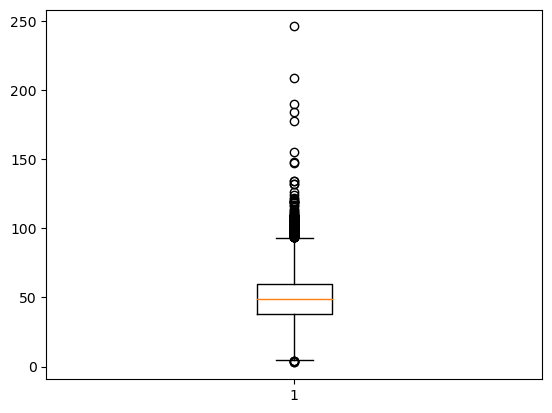

In [253]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)

plt.show()

We can see that the average review has just under 61 words with a standard deviation of just over 20 words.

In [254]:
# Tokenize our training data
max_features = 10000
max_length= 50 # decided this value after looking at the average value of the review length in the data set
oov_token = '<UNK>'
tokenizer_obj=Tokenizer(num_words=max_features,oov_token=oov_token)
tokenizer_obj.fit_on_texts(X)

In [255]:
# define vocabulary size
vocab_size=len(tokenizer_obj.word_index)+1
print("Vocabulary size:  ",vocab_size)

Vocabulary size:   26989


## Vocab mapping
-There is no word for 0th index



In [256]:
tokenizer_obj.word_index

{'<UNK>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'get': 5,
 'make': 6,
 'say': 7,
 'report': 8,
 'one': 9,
 'go': 10,
 'time': 11,
 'year': 12,
 'find': 13,
 'take': 14,
 'day': 15,
 'u': 16,
 'area': 17,
 'woman': 18,
 's': 19,
 'like': 20,
 'donald': 21,
 'first': 22,
 'old': 23,
 "trump's": 24,
 'house': 25,
 'life': 26,
 'people': 27,
 "'": 28,
 'show': 29,
 'back': 30,
 'call': 31,
 'white': 32,
 'give': 33,
 'still': 34,
 'know': 35,
 'obama': 36,
 'look': 37,
 'want': 38,
 'think': 39,
 'watch': 40,
 'women': 41,
 'plan': 42,
 'work': 43,
 'come': 44,
 'use': 45,
 '5': 46,
 'school': 47,
 'clinton': 48,
 'could': 49,
 'tell': 50,
 'state': 51,
 'live': 52,
 'right': 53,
 'need': 54,
 'world': 55,
 'way': 56,
 'see': 57,
 'americans': 58,
 'study': 59,
 'kill': 60,
 'family': 61,
 'love': 62,
 'change': 63,
 'would': 64,
 'bill': 65,
 'black': 66,
 'leave': 67,
 'gop': 68,
 'last': 69,
 'years': 70,
 'talk': 71,
 'really': 72,
 'shoot': 73,
 'american': 74,
 'best': 75,
 '3': 76,

# Features and Labels

In [280]:
# Encode training and test data sentences into sequences
X_train_tokens= tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens= tokenizer_obj.texts_to_sequences(X_test)

# Pad the training sequences
X_train_pad= pad_sequences(X_train_tokens,maxlen=max_length,padding="post",truncating="post")
X_test_pad=pad_sequences(X_test_tokens,maxlen=max_length,padding="post",truncating="post")

In [297]:
# mapping of indexes to words
idx_word=tokenizer_obj.index_word

for i in range(10):
    print(f"{i}th head line: "," ".join(idx_word[w] for w in X_train_tokens[i]))

0th head line:  experts caution new car lose 90 value soon drive cliff
1th head line:  'how could harvey weinstein get away this ' ask man currently ignore sexual misconduct 17 separate coworkers friends <UNK>
2th head line:  <UNK> troll marco rubio <UNK> bible verse tweet
3th head line:  russell simmons lead 'i muslim too' rally new york
4th head line:  fall look like sign us
5th head line:  gluten free <UNK> follow fad <UNK> dream part confusion
6th head line:  <UNK> instructions part plan ' <UNK> richard nixon tattoo <UNK> roger <UNK> back
7th head line:  gay couple open build beautiful family
8th head line:  <UNK> lee <UNK> deny get <UNK> implant
9th head line:  erika <UNK> cole man marry


In [281]:
# Summarize number of words in training data
print("Number of unique words in training data: ")
print(len(np.unique(np.hstack(X_train_tokens))))

Number of unique words in training data: 
9968


In [282]:
# Summarize number of words in training data
print("Number of unique words in training data: ")
print(len(np.unique(np.hstack(X_test_tokens))))

Number of unique words in training data: 
7453


In [266]:
# Output the results of our work
print("Vocab size:\n", vocab_size)
print("\nTraining sequences:\n", X_train_tokens[:5])
print("\nPadded training sequences:\n", X_train_pad)
print("\nPadded training shape:", X_train_pad.shape)
print("Training sequences data type:", type(X_train_tokens))
print("Padded Training sequences data type:", type(X_train_pad))

Vocab size:
 26989

Training sequences:
 [[693, 6421, 2, 305, 118, 1497, 1195, 1160, 342, 5527], [3958, 49, 1151, 1916, 5, 220, 1705, 28, 86, 4, 1464, 1069, 205, 1624, 996, 2106, 1713, 285, 1], [1, 1534, 1276, 862, 1, 2092, 9508, 313], [3691, 5492, 185, 468, 616, 7682, 689, 2, 248], [287, 37, 20, 255, 203]]

Padded training sequences:
 [[ 693 6421    2 ...    0    0    0]
 [3958   49 1151 ...    0    0    0]
 [   1 1534 1276 ...    0    0    0]
 ...
 [  18  443 1376 ...    0    0    0]
 [ 607 1027   15 ...    0    0    0]
 [ 318 3914   49 ...    0    0    0]]

Padded training shape: (22895, 50)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


## Building the model using embedding Layer
The Embedding layer requires the specification of the vocabulary size (vocab_size), the size of the real-valued vector space EMBEDDING_DIM = 100, and the maximum length of input documents max_length .

In [391]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding,Bidirectional,SpatialDropout1D,Flatten,Masking

Embedding_dim=100
print("Build Model")

model= Sequential()
model.add(Embedding(input_dim=max_features,output_dim=Embedding_dim,input_length=max_length))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history=model.fit(X_train_pad, y_train,
          batch_size=32,
          epochs=15,
          validation_data=(X_test_pad, y_test))


Build Model
Train...
Epoch 1/15
716/716 [==============================] - 42s 59ms/step - loss: 0.6926 - accuracy: 0.5204 - val_loss: 0.6919 - val_accuracy: 0.5285
Epoch 2/15
716/716 [==============================] - 41s 58ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/15
716/716 [==============================] - 41s 57ms/step - loss: 0.6924 - accuracy: 0.5204 - val_loss: 0.6920 - val_accuracy: 0.5285
Epoch 4/15
716/716 [==============================] - 41s 57ms/step - loss: 0.6925 - accuracy: 0.5224 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 5/15
716/716 [==============================] - 41s 57ms/step - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6920 - val_accuracy: 0.5285
Epoch 6/15
716/716 [==============================] - 40s 57ms/step - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 7/15
716/716 [==============================] - 40s 57ms/step - loss: 0.6922 - accuracy: 0.5223 - val_loss: 0

In [392]:
score, acc = model.evaluate(X_test_pad, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

179/179 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5285
Test score: 0.6916835904121399
Test accuracy: 0.5284765958786011


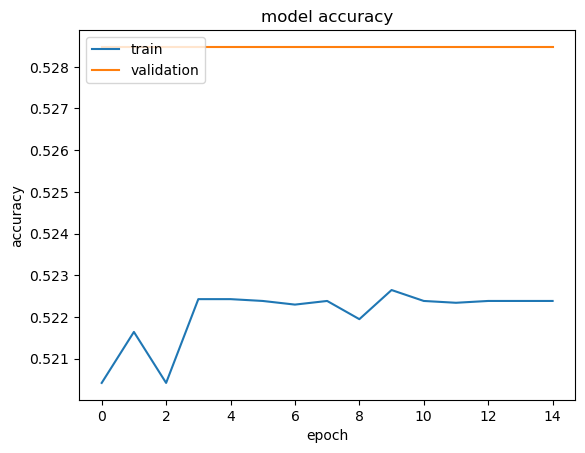

In [393]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

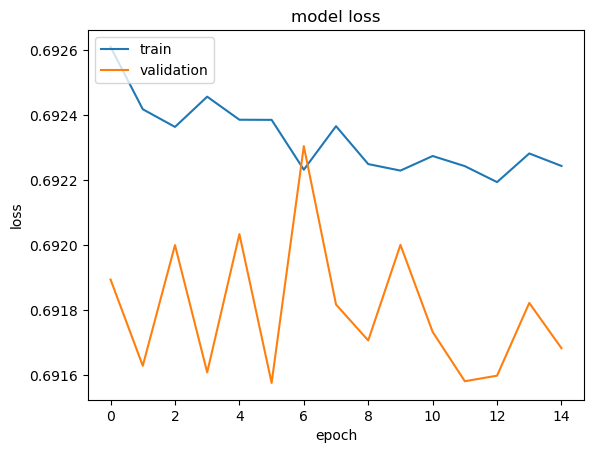

In [394]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

##  Building the model using Pre-trained Embedding
There is another approach to building the Sentiment clarification model. Instead of training the embedding layer, we can first separately learn word embeddings and then pass to the embedding layer. This approach also allows to use any pre-trained word embedding and also saves the time in training the classification model.

In [308]:
# removing punctuations
headlines=[]
    
def pre_process_text(text):
    # remove punctuations
    punct_free="".join([t for t in text if t not in string.punctuation ])
    # tokenize
    tokens= word_tokenize(punct_free)
    # convert to lower case
    tokens=[ word.lower() for word in tokens]
    # remove leading and traiing spaces
    tokens=[ word.strip() for word in tokens]
    # remove stop words
    words= [ word for word in tokens if word not in stop_words]
    
    
    return words

data["headline_tokenized"]=data["headline"].apply(lambda x: pre_process_text(x))


In [309]:
data.head()

,is_sarcastic,headline,headline_clean,headline_tokenized
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep. totally nails why congress is falling...,dem rep. totally nail congress fall short gend...,"[dem, rep, totally, nails, congress, falling, ..."
2,0,eat your veggies: 9 deliciously different recipes,eat veggies: 9 deliciously different recipes,"[eat, veggies, 9, deliciously, different, reci..."
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work,"[inclement, weather, prevents, liar, getting, ..."
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word 'streaming' ...,"[mother, comes, pretty, close, using, word, st..."


## Create embedding matrix using GloVE
Use Pre-trained Embedding

In [321]:
import os
path=os.getcwd()

# Create lookup of words to vectors
embedding_index={}
# What this does is assign a 50-dimensional vector to each word in the vocab. 
#If the word has no pre-trained embedding then this vector will be all zeros.
f = open(os.path.join(path,'glove.6B.50d.txt\glove.6B.50d.txt'),encoding="utf-8")
for line in f:
    # print(line)
    values=line.split()
    word=values[0]
    # print(word)
    embd= np.asarray(values[1:])
    # print(embd)
    embedding_index[word]=embd
    
f.close() 


In [353]:
# lets see embedding matrix
embedding_index["trump"]

array(['0.45769', '0.85191', '0.31098', '1.3478', '-0.021703', '-0.05467',
       '-0.17405', '-0.71014', '-0.57441', '0.49786', '-0.89382',
       '0.58661', '-0.77013', '0.23779', '0.37652', '1.3668', '0.34667',
       '0.082452', '0.17561', '0.056062', '0.50818', '0.33751', '-0.8517',
       '0.034619', '-0.57237', '-1.1534', '-0.54159', '0.24328',
       '0.018737', '-0.58645', '0.15261', '0.53372', '-0.27601',
       '0.065097', '0.3968', '-0.62892', '0.0046726', '0.081347',
       '-0.32579', '-0.60933', '-0.36464', '0.17591', '0.0050718',
       '1.3606', '-0.78583', '0.083121', '-0.75184', '-0.74226',
       '0.77053', '0.26394'], dtype='<U9')

The next step is to convert the word embedding into tokenized vector.The headline are integer encoded prior to passing them to the Embedding layer. The integer maps to the index of a specific vector in the embedding layer. Therefore, it is important that we lay the vectors out in the Embedding layer such that the encoded words map to the correct vector.

In [343]:
# New matrix to hold word embeddings
embedding_matrix=np.zeros((vocab_size,50))

for word, i in tokenizer_obj.word_index.items():
    if i > max_features:
        continue
    embedding_vector=embedding_index.get(word)    
    print
    if embedding_vector is not None:
        # words not found in embedding index will will be all zeros
        embedding_matrix[i]=embedding_vector

## Define model
- Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. In the end add a final dense layer with sigmoid activation for binary classification.
- We have not trained the embeddings generated from glove data as we are getting good results without it as well


In [381]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping

# Create callbacks
es=EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
             
lstm_out = 196

# define the model
model_glove = Sequential()
model_glove.add(Embedding(vocab_size,
                    output_dim=50,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    trainable=False))
# Masking layer for pre-trained embeddings
model_glove.add(Masking(mask_value=0.0))
model_glove.add(SpatialDropout1D(0.4))
model_glove.add(Bidirectional(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5)))
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))

## Compile the model

In [382]:
# compile the model
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_glove.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 50)            1349450   
_________________________________________________________________
masking_1 (Masking)          (None, 50, 50)            0         
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 392)               387296    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                25152     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 1,761,963
Trainable params: 412,513
Non-trainable params: 1,349,450
_____________________________________

In [383]:
history_glove=model_glove.fit(X_train_pad, y_train,
          batch_size=32,
          epochs=15,
          callbacks=[es] ,                  
          validation_data=(X_test_pad, y_test))


Epoch 1/15
716/716 [==============================] - 578s 807ms/step - loss: 0.6232 - accuracy: 0.6511 - val_loss: 0.5902 - val_accuracy: 0.6918
Epoch 2/15
716/716 [==============================] - 654s 913ms/step - loss: 0.5953 - accuracy: 0.6828 - val_loss: 0.5484 - val_accuracy: 0.7276
Epoch 3/15
716/716 [==============================] - 393s 548ms/step - loss: 0.5769 - accuracy: 0.6952 - val_loss: 0.5726 - val_accuracy: 0.7030
Epoch 4/15
716/716 [==============================] - 335s 467ms/step - loss: 0.5601 - accuracy: 0.7066 - val_loss: 0.5375 - val_accuracy: 0.7278
Epoch 5/15
716/716 [==============================] - 339s 473ms/step - loss: 0.5531 - accuracy: 0.7149 - val_loss: 0.5295 - val_accuracy: 0.7322
Epoch 6/15
716/716 [==============================] - 379s 529ms/step - loss: 0.5465 - accuracy: 0.7203 - val_loss: 0.5144 - val_accuracy: 0.7423
Epoch 7/15
716/716 [==============================] - 388s 542ms/step - loss: 0.5404 - accuracy: 0.7191 - val_loss: 0.5082 -

## Plot the model accuracy and loss across epochs

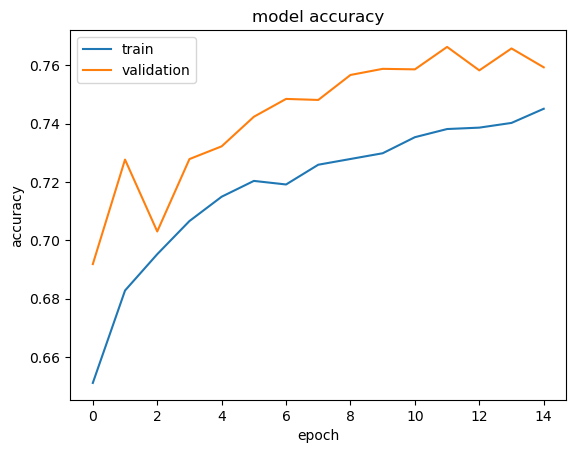

In [384]:
# summarize history for accuracy
plt.plot(history_glove.history['accuracy'])
plt.plot(history_glove.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();


    

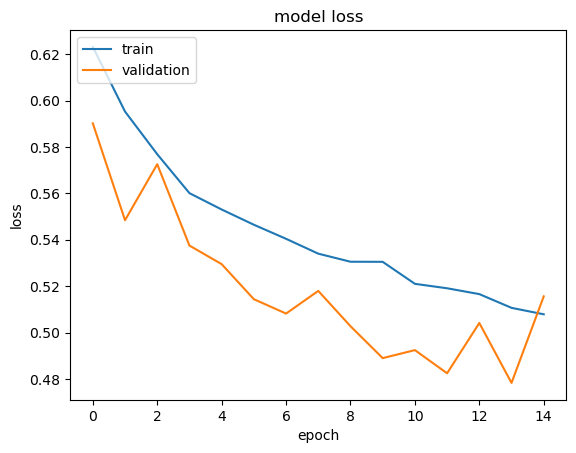

In [385]:
# summarize history for loss
plt.plot(history_glove.history['loss'])
plt.plot(history_glove.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

## Inference on new data

Randomly selecting 10 recods from dataset and doing predictions

In [447]:
examples=[]
indexes=[]
for i in range(10):
    index=np.random.randint(200,1000)
    indexes.append(index)
    examples.append((data["headline_clean"][index]))

In [448]:
examples

["rand paul warn donald trump choose 'menace' john bolton secretary state",
 'climate researchers warn hope humanity lie possibility make',
 'audio experts confirm whiny, irritate noise secret record devin nunes',
 "steven avery doubt he'll free man nephew's conviction overturn",
 'martin shkreli face rough stay prison system inmates fund hair theft lowest caste',
 'ninja-like parent demonstrate escape sleep baby',
 'rwanda become magnet chinese money migrants',
 'orlando locals fear town start become overrun tourists',
 "gleeful kate mckinnon unleash inner robert mueller 'snl'",
 "trump respond father kill american soldier, can't name single sacrifice"]

In [449]:
test_samples_tokens= tokenizer_obj.texts_to_sequences(examples)
test_samples_tokens_pad=pad_sequences(test_samples_tokens,maxlen=max_length,padding="post",truncating="post")
prediction_probs=model_glove.predict(test_samples_tokens_pad)


In [450]:
y_pred=[]
for preds in prediction_probs:
    if preds >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [451]:
y_actuals=data.loc[indexes,"is_sarcastic"]
print(pd.DataFrame({"Actuals":y_actuals,"Predictions":y_pred}).reset_index(drop=True))

   Actuals  Predictions
0        0            0
1        1            1
2        1            1
3        0            0
4        1            1
5        0            1
6        0            0
7        1            1
8        0            0
9        0            1


In [458]:
y_preds=np.round(model_glove.predict(X_test_pad))

In [469]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.80      0.72      0.76      3025
           1       0.72      0.80      0.76      2699

    accuracy                           0.76      5724
   macro avg       0.76      0.76      0.76      5724
weighted avg       0.76      0.76      0.76      5724



Area under the curve 0.845700060322311


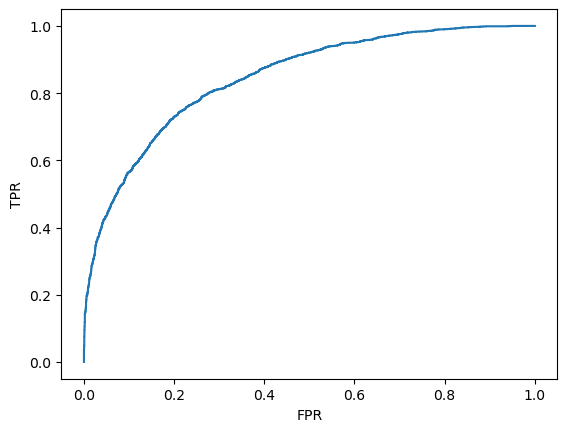

In [475]:
fpr,tpr,_= roc_curve(y_test,model_glove.predict_proba(X_test_pad))
auc=roc_auc_score(y_test,model_glove.predict_proba(X_test_pad))
print("Area under the curve",auc)
plt.plot(fpr,tpr,label="Sarcasm data, auc="+str(auc*100)+"%")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

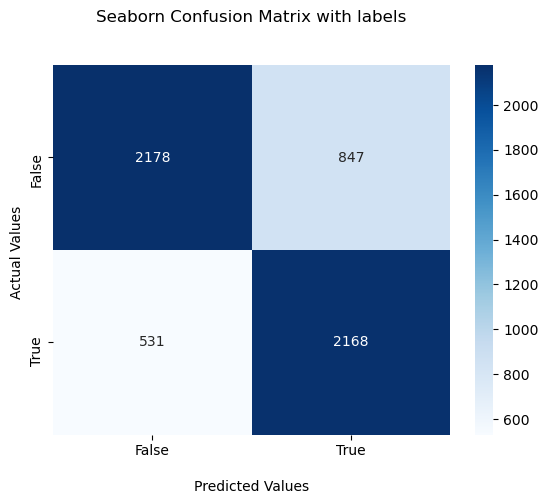

In [474]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, cmap='Blues',fmt='')
# Here, you’ll store heatmap in variable ax.

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()